<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU - TIME SERIES 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 1 - Preprocessing 📌
</div>

### Nhập các thư viện cần thiết

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv("../Datasets/Aquifer_Petrignano.csv")
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


### Kích thước của tập dữ liệu

In [3]:
df.shape

(5223, 8)

### Ý nghĩa của từng hàng
- Mỗi dòng thể hiện thông tin các thuộc tính đo được trong 1 ngày tại Petrignano.

### Kiểm tra hàng trùng lặp

In [4]:
duplicates = df.duplicated().sum()

print("There are {} duplicate rows in the dataset".format(duplicates))

df = df.drop_duplicates()

df.shape

There are 0 duplicate rows in the dataset


(5223, 8)

### Kiểm tra kiểu dữ liệu của các cột

In [5]:
data_types = df.dtypes
data_types

Date                                     object
Rainfall_Bastia_Umbra                   float64
Depth_to_Groundwater_P24                float64
Depth_to_Groundwater_P25                float64
Temperature_Bastia_Umbra                float64
Temperature_Petrignano                  float64
Volume_C10_Petrignano                   float64
Hydrometry_Fiume_Chiascio_Petrignano    float64
dtype: object

### Xử lý dữ liệu

In [6]:
df.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

**Xóa các hàng có giá trị null**
Dựa theo `Rainfall_Bastia_Umbra` để xóa vì cột này có nhiều giá trị null nhất.

In [7]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

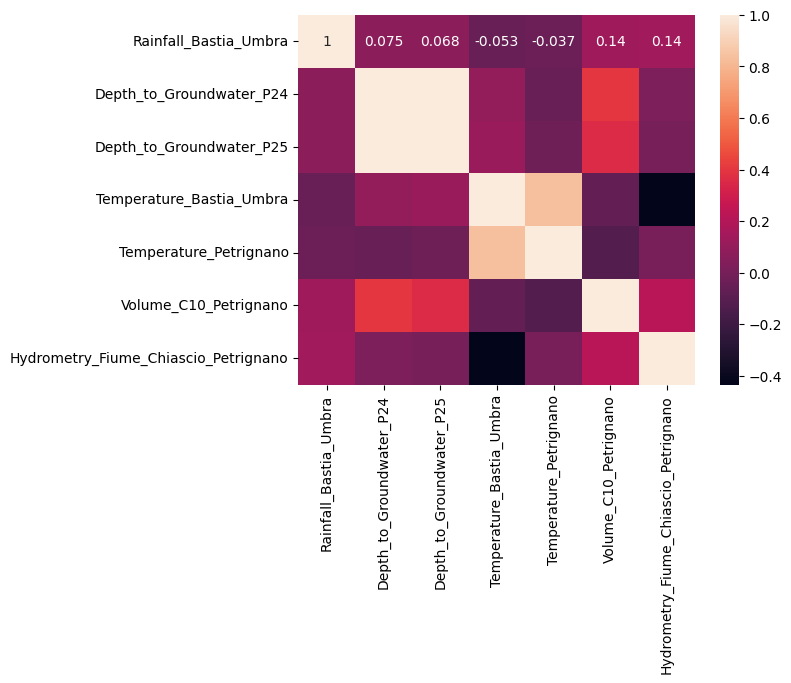

In [8]:
sns.heatmap(df.drop(['Date'], axis=1).corr(),annot=True)
plt.show()


Dựa trên đồ thị tương quan, có thể thấy:
- `Depth_to_Groundwater_P24` và `Depth_to_Groundwater_P25` có độ tương quan cao.
- `Temperature_Bastia_Umbra` và `Temperature_Petrignano ` có độ tương quan cao.

Ta có thể xóa 1 trong các thuộc tính của mỗi cặp. Tuy nhiên, vì đã có `Rainfall_Bastia_Umbra`, để tổng quát sẽ giữ lại các thuộc tính liên quan tới `Bastia Umbra`.

In [9]:
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

**Đổi tên các cột theo hướng tổng quát**

In [10]:
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


- ***Features:***
    - **Rainfall**: Lượng mưa biểu thị lượng mưa rơi (mm)
    - **Temperature**: Nhiệt độ biểu thị nhiệt độ (°C)
    - **Drainage_Volume**: Thể tích cho biết thể tích nước lấy từ nhà máy xử lý nước uống (m3)
    - **River_Hydrometry**: Tỷ trọng kế chỉ mực nước ngầm (m)

- ***Target:***
    - **Depth_to_Groundwater**: Độ sâu tới nước ngầm biểu thị mực nước ngầm (m tính từ tầng trệt)

### Dữ liệu DateTime

Vì chúng ta đang làm việc với TimeSeries problem nên thuộc tính quan trọng nhất là thuộc tính thời gian, cụ thể là cột `Date`. Vì dữ liệu đã ở sẵn dạng `dd/mm/yyyy` nên không cần xử lý nhiều, chỉ cần chuyển đổi nó thành kiểu dữ liệu `datetime64`

In [11]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


### Các giá trị được phân bổ với mỗi cột số

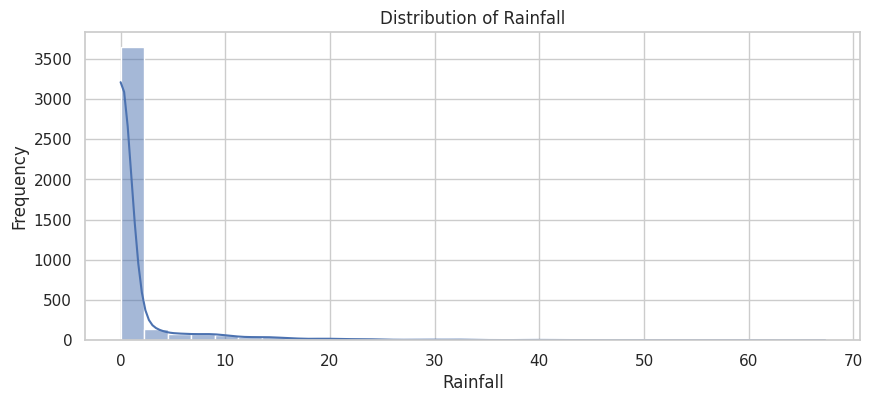

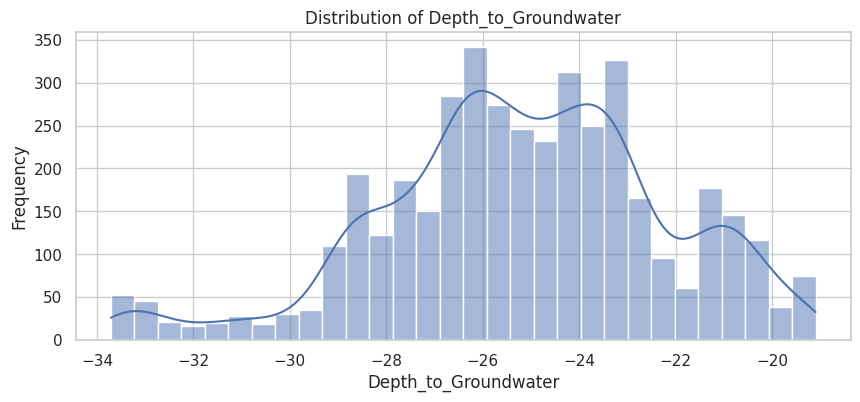

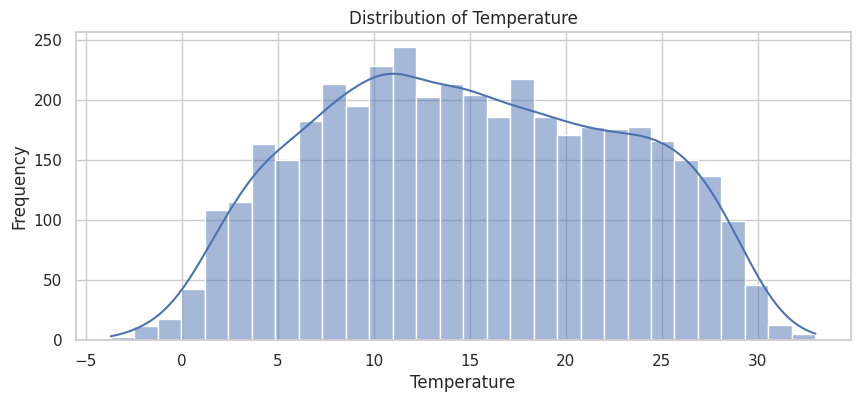

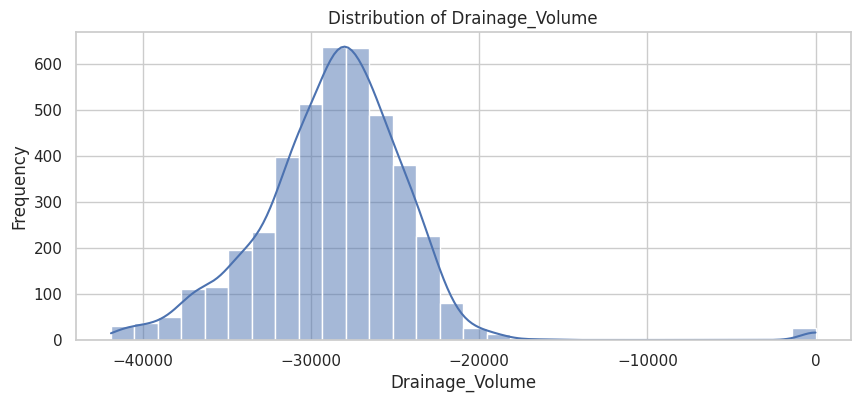

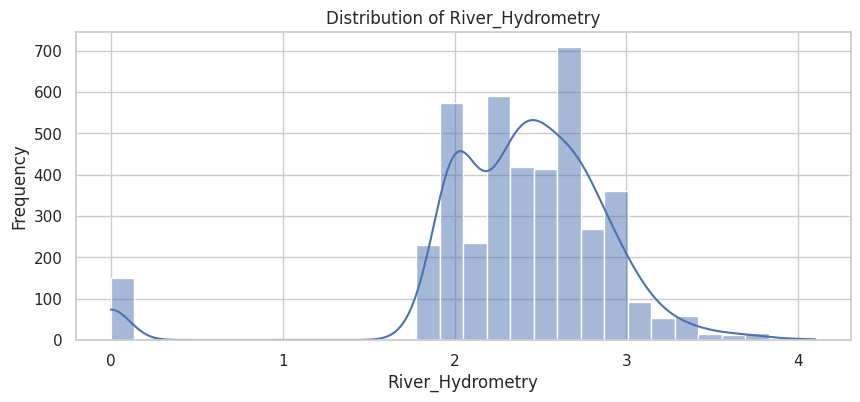

In [12]:
# Setting the plot style
sns.set(style="whitegrid")
# lọc ra các cột numerical
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Plotting distributions
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Trực quan đặc trưng theo Time Series

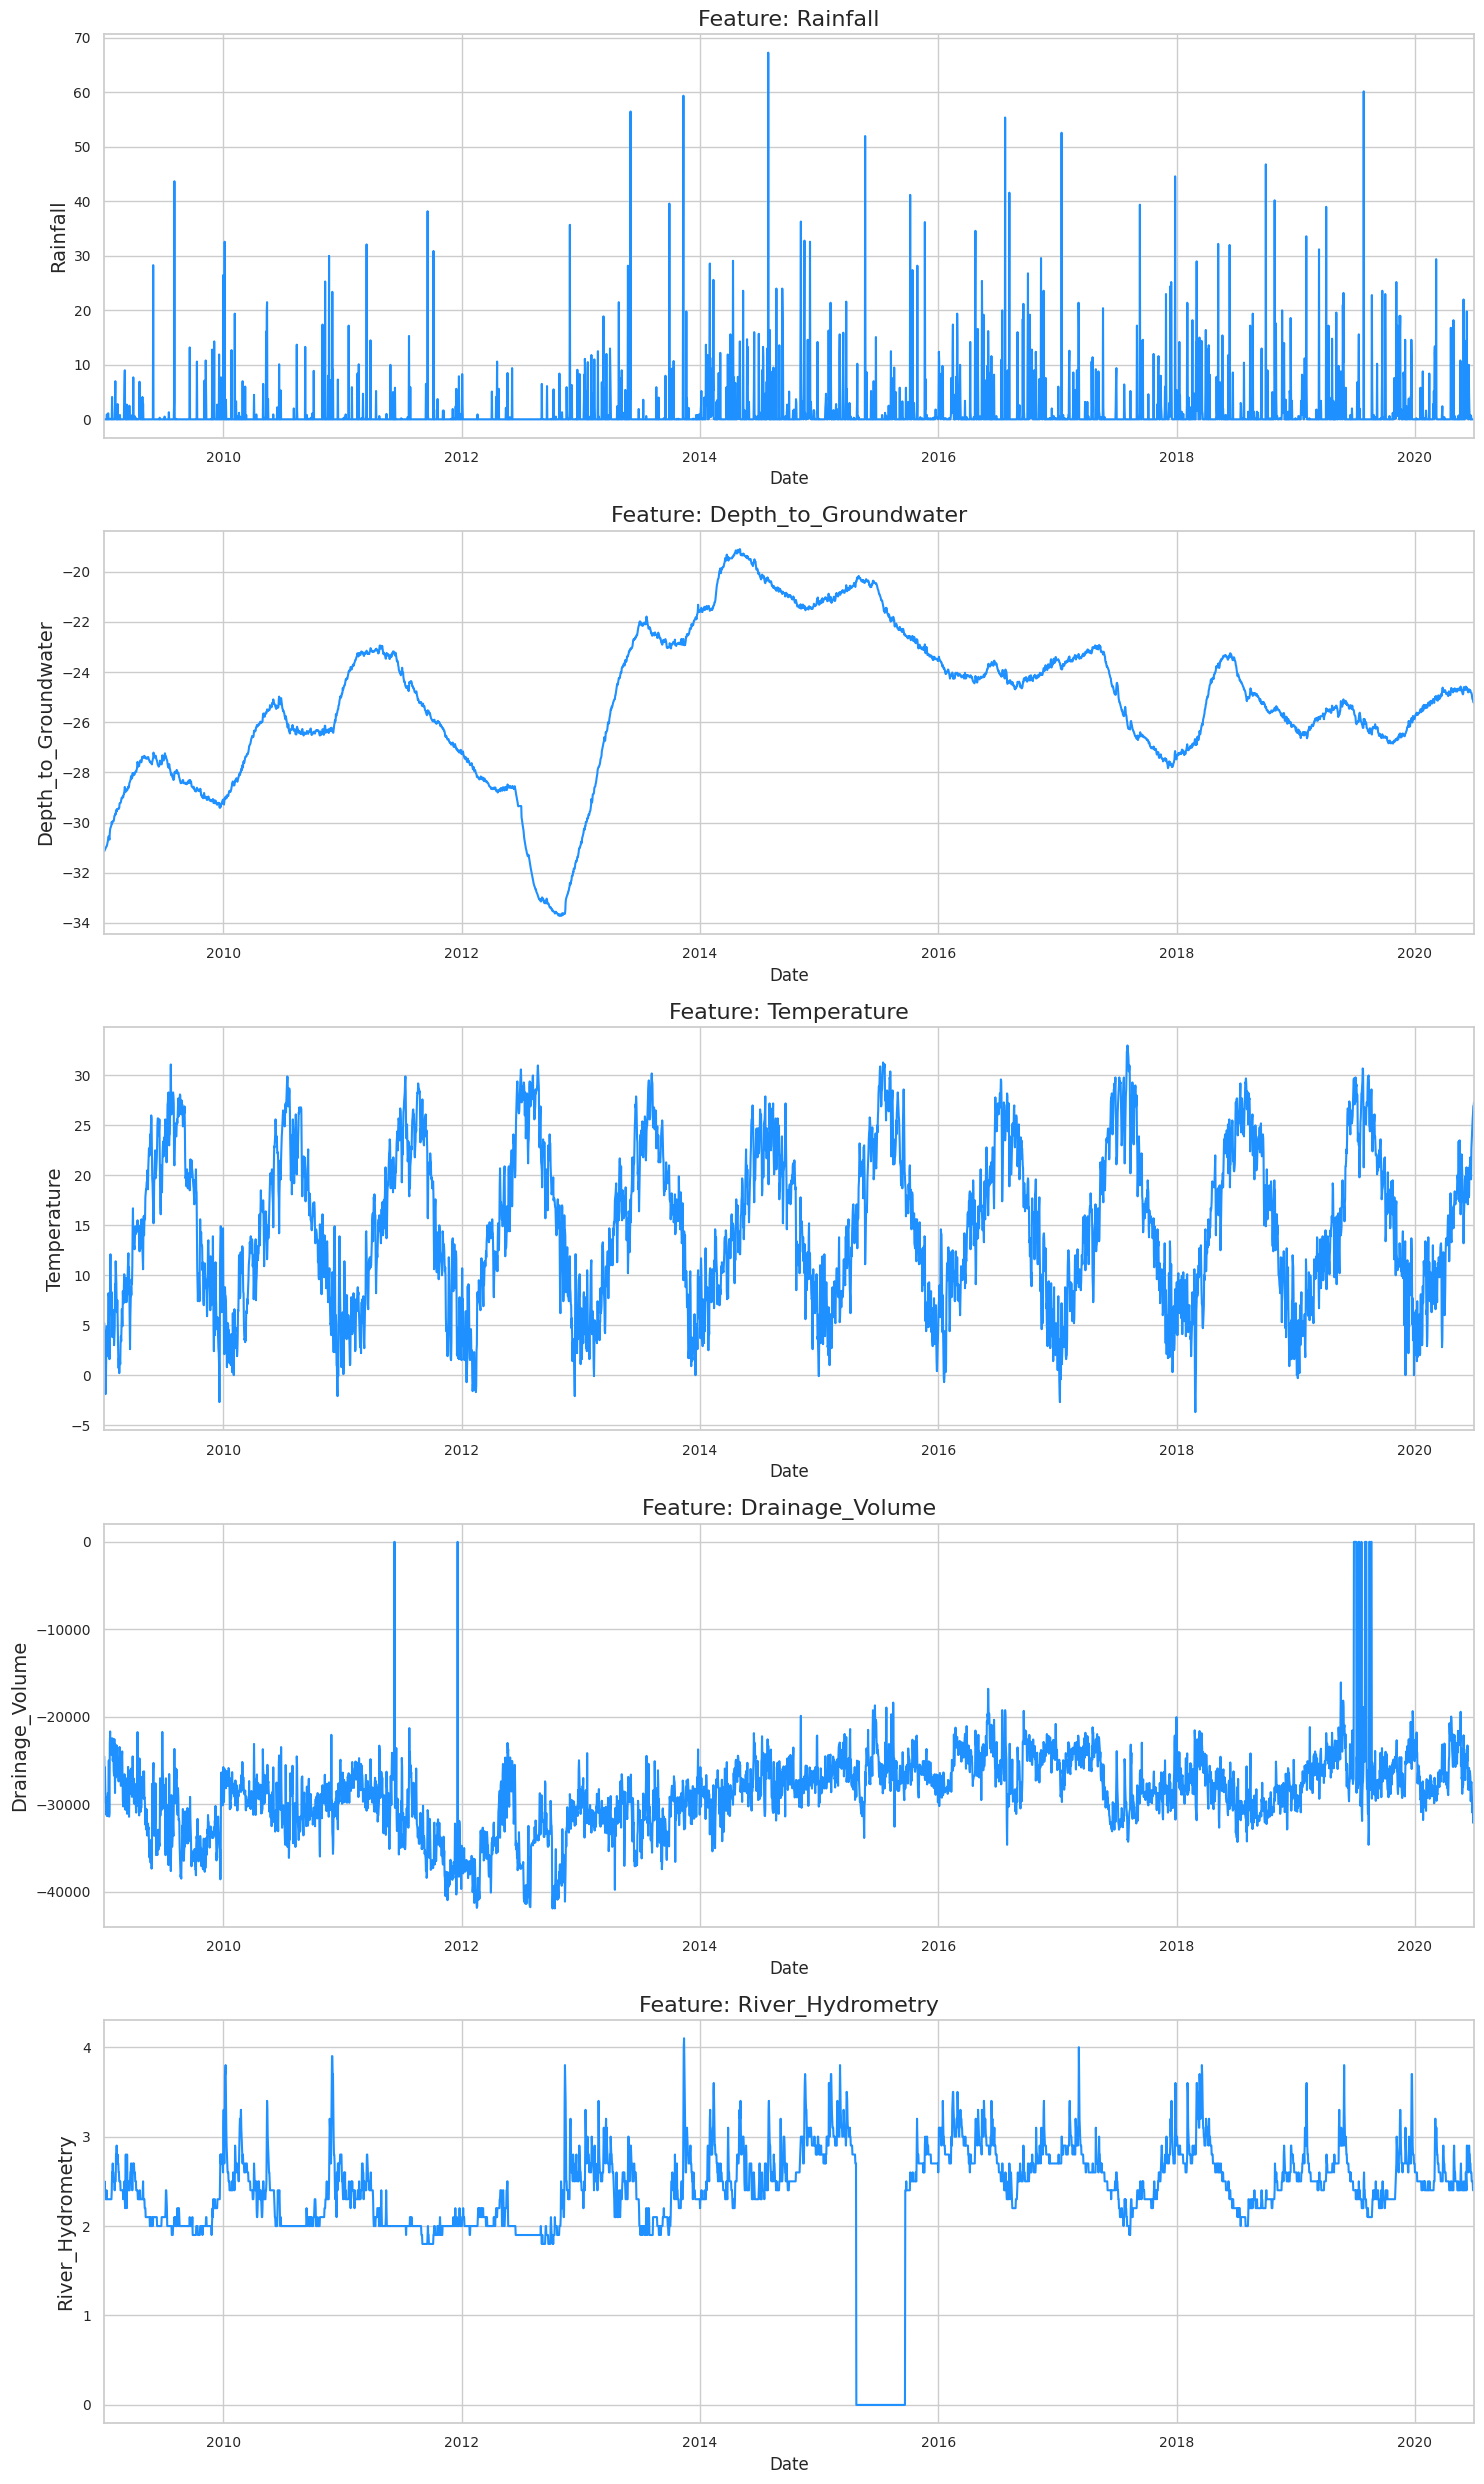

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

# Lặp qua các cột trong DataFrame trừ cột 'Date'
for i, column in enumerate(df.drop('Date', axis=1).columns):
    # Vẽ đồ thị dạng đường
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=axs[i], color='dodgerblue', linewidth=1.5)
    
    # Thiết lập tiêu đề và nhãn trục y
    axs[i].set_title('Feature: {}'.format(column), fontsize=14)
    axs[i].set_ylabel(ylabel=column, fontsize=14)
    
    # Thiết lập giới hạn trục x
    axs[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   

    # Tăng kích thước của các nhãn trục và tiêu đề
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)
    axs[i].title.set_size(16)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

### Lưu dữ liệu vào tệp .csv

In [14]:
save_name = "Water_Cleaner_1.csv"
df.to_csv("../Datasets/" + save_name, index=False)